In [1]:
################################################################################################
#  RUT-SOM-DATA-PT-06-2020-U-C                                                    Douglas High #
#   Machine-Learning-Challenge                                                November 7, 2020 #
#         > model_final.ipynb                                                                  #
#    - composite of selected code from model0_compare and model_top3.                          #
#    - use RandomForest model with no scaling.                                                 #
#    - fit model, train & test data, evaluate and drop features, tune with GridSearch.         #
#    - save df of predictions to csv and save model to .save file.                             #
################################################################################################

In [2]:
#############################################################################
#00.UI     Update/Install                                                   #
#    a- install/check for update sklearn (to prevent version mismatches).   #
#    b- install joblib - used to save model (uncomment to install).         #
#       *** Restart Kernal after joblib install ***                         #
#############################################################################

#a
!pip install sklearn --upgrade

#b
# !pip install joblib

In [3]:
###########################
#00   I/O                 #
#   - import libraries.   #
#   - associate file.     #
###########################

import pandas as pd
from matplotlib import pyplot
import warnings; warnings.simplefilter('ignore')

data_in = "../data_in/exoplanet_data.csv"

In [4]:
##############################################################################
#10     Read and remove                                                      #
#   - read data into df.                                                     #
#   - drop null columns if all values are null.                              #
#   - drop null rows.                                                        #
#   - keep only records with a known value (confirmed or false positive).    #
##############################################################################

df = pd.read_csv(data_in)
df = df.dropna(axis='columns', how='all')
df = df.dropna()

known_df = df[df["koi_disposition"] != "CANDIDATE"]

In [5]:
###################################################
#20     Set Features                              #
#   - select all columns to use as features       #
#   - disposition is the dependent variable.      #
###################################################

X = known_df.drop("koi_disposition", axis=1)
y = known_df["koi_disposition"]

In [6]:
########################################################
#30     Test/train split                               #
#   - split known_df into training and testing data.   #
########################################################

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
################################
#40    RandomForest no scale   #
#   a- create and fit model.   #
#   b- print results.          #
################################

#a 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)

#b
model = "RandomForest"
train = rf.score(X_train, y_train)
test = rf.score(X_test, y_test)
avg = (train+test)/2 
print (f"{model} training score: {train}, testing score: {test}, average: {avg}")

RandomForest training score: 1.0, testing score: 0.9826546003016591, average: 0.9913273001508296


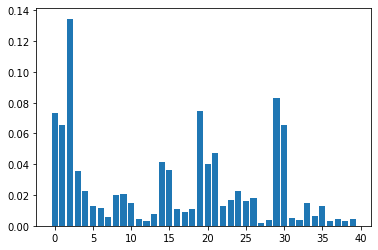

,index,score
0,27.0,0.001962
0,12.0,0.003017
0,38.0,0.003215
0,36.0,0.003333
0,32.0,0.003552
0,28.0,0.003901
0,37.0,0.004117
0,39.0,0.004117
0,11.0,0.004215
0,31.0,0.005040


In [8]:
###########################################
#50     RandomForest features             #
#   - list and plot feature importance.   #
###########################################

rf_feature_df = pd.DataFrame({"index":[], "score":[]})
importance = rf.feature_importances_
 
for i,v in enumerate(importance):
    rf_feature_df = rf_feature_df.append(pd.DataFrame([[i,v]], columns=rf_feature_df.columns))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

rf_feature_df.sort_values(["score"], inplace=True)  
rf_feature_df

In [9]:
#########################################################################################
#60   RandomForest feature selection                                                    #
#   a- remove columns with score lt 1%.                                                 #
#   b- split new df.                                                                    #
#   c- run model on new data.                                                           #
#   d- recalculate original scores then new scores and print comparison.                #
#########################################################################################

#a
# cols = [27,38,12,28,32,36,37,39,31,11,34,7,13,17,5]
# cols = [27,36,38,12,39,28,32,37,34,11,31,7,13,16,18,17]
# cols = [27,38,36,32,12,28,39,37,11,34,7,31,13,5,18]
cols = [27,36,32,38,28,37,12,39,11,31,34,13,17,7,18]
X60 = X.drop(X.columns[cols],axis=1)

#b
X60_train, X60_test, y60_train, y60_test = train_test_split(X60, y, random_state=42)

#c
rf60 = RandomForestClassifier(n_estimators=200)
rf60 = rf60.fit(X60_train, y60_train)
predictions = rf60.predict(X60_test)

#d
# original scores
train = rf.score(X_train, y_train)
test = rf.score(X_test, y_test)
avg = (train+test)/2

#  new scores
train60 = rf60.score(X60_train, y_train)
test60 = rf60.score(X60_test, y_test)
avg60 = (train60+test60)/2

# compare scores
print(f"train:   {train} test:   {test}  avg:   {avg}")
print(f"train60: {train60} test60: {test60}  avg60: {avg60}")

train:   1.0 test:   0.9826546003016591  avg:   0.9913273001508296
train60: 1.0 test60: 0.9803921568627451  avg60: 0.9901960784313726


In [10]:
###############################
#70    ModelParameters        #
#   - print off parameters.   #
###############################

print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [11]:
###############################################
#80   RandomForest GridSearch                 #
#   - run gridsearch on various parameters.   # 
###############################################

from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators": [10, 100, 200, 500],
              "max_features": ["auto", "sqrt", "log2", int, float, None],
              "ccp_alpha": [0, 0.01, 0.1, 1, 10],
              "random_state": [int, "RandomState", None]}
rf_grid = GridSearchCV(rf60, param_grid, verbose=0)
rf_grid.fit(X60_train, y60_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=No...
                                              random_state=None, verbose=0,
                                   

In [12]:
###########################################################
#90   RandomForest GridResult                             #
#   - print best params and score.                        # 
#   - make predictions and print classification report.   #
#   - print comparison of test scores.                    #
###########################################################

print(rf_grid.best_params_)
print(rf_grid.best_score_)
predictions90 = rf_grid.predict(X60_test)

from sklearn.metrics import classification_report
print(classification_report(y60_test, predictions90,
                            target_names=["CONFIRMED", "FALSE POSITIVE"]))

print(f"original test score:    {rf.score(X_test, y_test)}")
print(f"dropped features score: {rf60.score(X60_test, y60_test)}")
print(f"hypertuned test  score: {rf_grid.best_score_}")

{'ccp_alpha': 0, 'max_features': None, 'n_estimators': 500, 'random_state': None}
0.9906997250402959
                precision    recall  f1-score   support

     CONFIRMED       1.00      0.97      0.98       451
FALSE POSITIVE       0.98      1.00      0.99       875

      accuracy                           0.99      1326
     macro avg       0.99      0.98      0.99      1326
  weighted avg       0.99      0.99      0.99      1326

original test score:    0.9826546003016591
dropped features score: 0.9803921568627451
hypertuned test  score: 0.9906997250402959


In [13]:
##################################################################
#100    RandomForest vs Candidates                               #
#   a- run model against unknown data.                           #
#   b- predict disposition and add column to df, write to csv.   #
##################################################################

#a
unknown_df = df[df["koi_disposition"] == "CANDIDATE"]
X100 = unknown_df.drop("koi_disposition", axis=1)
X100 = X100.drop(X100.columns[cols],axis=1)

#b
predictions = rf_grid.predict(X100)
X100["koi_predicted"] = predictions
X100.to_csv("../data_out/final.csv", index=False, header=True)

In [14]:
#################################################
#110     Save model                             #     
#   - save model as per starter code example.   # 
#################################################

import joblib
filename = '../douglas_high.sav'
joblib.dump(rf_grid, filename)

['../douglas_high.sav']